# **Project Dependencies**

In [1]:
!pip install deepface
!pip install opencv-python
!pip install os
!pip install gradio
!pip install numpy
!pip install PIL
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 17.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=7fe9d65911793290c40902a01909467dea7e27f50276ccb092a6c61ceed003a4
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.4 MB/s e

# **Face Recognition and Detection**

In [2]:
import gradio as gr
import cv2
import os
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from deepface import DeepFace

# Set the directory for the reference images
directory_path = "/content/images"

# Ensure the directory exists
os.makedirs(directory_path, exist_ok=True)

# Load the reference images
def load_reference_images(directory_path):
    reference_directory = os.listdir(directory_path)
    loaded_reference_images = []

    for item in reference_directory:
        item_path = os.path.join(directory_path, item)
        if os.path.isfile(item_path):
            reference_image = cv2.imread(item_path)
            loaded_reference_images.append((item, reference_image))

    return loaded_reference_images

# Face recognition function
def process_image(image):
    # Convert PIL image to OpenCV format
    image_to_compare = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # Load reference images
    loaded_reference_images = load_reference_images(directory_path)

    # Initialize face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Initialize match details
    highest_percentage = 0
    best_match_filename = "No match found"

    # Perform face recognition for each reference image
    for item, reference_image in loaded_reference_images:
        # Detect Faces in the image to compare
        faces = face_cascade.detectMultiScale(image_to_compare, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Draw Rectangles Around Detected Faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image_to_compare, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Perform face recognition
        result = DeepFace.verify(reference_image, image_to_compare)

        # Check if the images match and calculate match percentage
        if result['verified']:
            match_percentage = 100 - (result['distance'] * 100)  # Convert distance to percentage
            if match_percentage > highest_percentage:
                highest_percentage = match_percentage
                best_match_filename = item  # Update the filename of the best match

    # Convert back to PIL format for Gradio
    processed_image = Image.fromarray(cv2.cvtColor(image_to_compare, cv2.COLOR_BGR2RGB))

    # Add text to the processed image
    draw = ImageDraw.Draw(processed_image)
    font = ImageFont.load_default()
    text_size = draw.textsize(f"Match: {highest_percentage:.2f}% with {best_match_filename}", font=font)
    width, height = processed_image.size

    # Draw text at the bottom of the image
    draw.text(((width - text_size[0]) / 2, height - text_size[1] - 10), f"Match: {highest_percentage:.2f}% with {best_match_filename}", fill="black", font=font)

    return processed_image, f"{highest_percentage:.2f}% with {best_match_filename}"

# Gradio Interface
interface = gr.Interface(
    fn=process_image,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil"), gr.Text()],
    title="Face Recognition Processor",
    description="Upload an image to see if it matches any reference images and get the match percentage along with the filename.",
)

# Launch the Gradio app
interface.launch()


24-08-29 17:26:27 - Directory /root/.deepface has been created
24-08-29 17:26:27 - Directory /root/.deepface/weights has been created
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0d91e31f2ea4932027.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Fingerprint Recognition**

In [4]:
import os
import cv2
import gradio as gr
import numpy as np

def match_fingerprint(real_image):
    # Path to dataset folder
    dataset_folder = "/content/Fingerprint Dataset"  # Adjust this path as needed

    # Convert Gradio image input to OpenCV format
    real_image = cv2.cvtColor(np.array(real_image), cv2.COLOR_RGB2BGR)

    counter = best_score = 0
    filename = image = kp1 = kp2 = mp = None

    # Loop through all images in the dataset
    for file in os.listdir(dataset_folder):
        if counter % 10 == 0:
            print("Searching through image :---> " + file)
        counter += 1
        fingerprint_image = cv2.imread(os.path.join(dataset_folder, file))

        # Initialize SIFT detector
        sift = cv2.SIFT_create()
        keypoint_1, descriptor_1 = sift.detectAndCompute(real_image, None)
        keypoint_2, descriptor_2 = sift.detectAndCompute(fingerprint_image, None)

        # Match descriptors using FLANN matcher
        matches = cv2.FlannBasedMatcher({'algorithm': 1, 'trees': 10}, {}).knnMatch(descriptor_1, descriptor_2, k=2)

        match_points = []

        for p, q in matches:
            if p.distance < 0.1 * q.distance:
                match_points.append(p)

        keypoints = min(len(keypoint_1), len(keypoint_2))

        # Check if the current image has a higher match percentage
        if len(match_points) / keypoints * 100 > best_score:
            best_score = len(match_points) / keypoints * 100
            filename = file  # Save the filename that matches
            image = fingerprint_image
            kp1, kp2, mp = keypoint_1, keypoint_2, match_points

    # Define a threshold for what constitutes a "match"
    match_threshold = 15.0  # Adjust this threshold as needed

    # Output the match percentage
    match_text = f"Percentage Match: {best_score:.2f}%"

    # Check if the match is above the threshold and print the result
    if best_score >= match_threshold:
        match_text += f"\nMatch Found! The matching file is: {filename}"
    else:
        match_text += "\nNo Match Found!"

    # Optionally create the result image
    if image is not None:
        result = cv2.drawMatches(real_image, kp1, image, kp2, mp, None)
        result = cv2.resize(result, None, fx=3, fy=3)
        result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    else:
        result = None

    return match_text, result

# Define Gradio interface
def main():
    with gr.Blocks() as demo:
        gr.Markdown("### Fingerprint Matching")
        real_image_input = gr.Image(type="pil", label="Upload Real Fingerprint Image")
        output_text = gr.Textbox(label="Match Result", lines=2)
        output_image = gr.Image(type="pil", label="Matched Image (if any)")

        real_image_input.change(
            fn=match_fingerprint,
            inputs=real_image_input,
            outputs=[output_text, output_image]
        )

    demo.launch()

if __name__ == "__main__":
    main()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3c7993f92ac4df6caf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Check ID Card Details or Medical Records**

In [6]:
import gradio as gr
import pandas as pd
import os

# Folder paths for CSV files and images
csv_folder_path = "/content/Id card dataset/"  # Update this to your actual folder path
image_folder_path = "/content/images"  # Update this to your actual image folder path

# Function to display the content of the selected CSV files and corresponding image
def display_csv_and_image(file_name):
    # Automatically append .csv extension to the file name
    csv_file_name = file_name + ".csv"

    # File paths for CSVs and images
    id_csv_file_path = os.path.join(csv_folder_path, csv_file_name)
    image_file_jpg = os.path.join(image_folder_path, file_name + ".jpg")
    image_file_png = os.path.join(image_folder_path, file_name + ".png")

    # Load ID CSV data
    if os.path.exists(id_csv_file_path):
        id_df = pd.read_csv(id_csv_file_path)
        id_table_html = id_df.to_html(index=False, classes="custom-table")
    else:
        id_table_html = "<p style='color:red;'>ID file not found. Please enter a valid file name.</p>"

    # Load image
    if os.path.exists(image_file_jpg):
        image_output = image_file_jpg
    elif os.path.exists(image_file_png):
        image_output = image_file_png
    else:
        image_output = None  # No image found

    # Switch visibility and return data
    return gr.update(visible=False), gr.update(visible=True), id_table_html, image_output

# Function to return to the input page
def go_back():
    return gr.update(visible=True), gr.update(visible=False), None, None

# Custom CSS to style the table, back button, and make the UI resemble Google's search interface
custom_css = """
body {
    font-family: Arial, sans-serif;
    text-align: center;
    margin-top: 20px;
}

input.svelte-1f354aw.svelte-1f354aw:focus, textarea.svelte-1f354aw.svelte-1f354aw:focus{
  border: none;
}

input[type=text] {
    width: 30%;
    padding: 12px 20px;
    margin: 8px 0;
    box-sizing: border-box;
    font-size: 18px;
}
button {
    padding: 10px 20px;
    font-size: 16px;
    cursor: pointer;
}
.custom-table {
    width: 100%;
    border-collapse: collapse;
    margin: 25px 0;
    font-size: 18px;
    text-align: left;
    border: 1px solid #ddd;
}
.custom-table th, .custom-table td {
    padding: 12px 15px;
    border: 1px solid #ddd;
}
.custom-table thead {
    background-color: #f4f4f4;
    border-bottom: 2px solid #ddd;
}
.custom-table tbody tr:nth-child(even) {
    background-color: #f9f9f9;
}
.custom-table tbody tr:hover {
    background-color: #f1f1f1;
}

/* Style the back button */
.back-button {
    width: 100px;
    height: 40px;
    border: none;
    border-radius: 5px;
    cursor: pointer;
    font-size: 16px;
    margin-top: 20px;
}
.back-button:hover {
    background-color: #45a049; /* Darker green on hover */
}
"""

# Gradio interface with multiple pages using visibility controls
with gr.Blocks(css=custom_css) as demo:
    with gr.Row(visible=True) as input_tab:
        gr.Markdown("<h1 style='text-align: center;'>Check ID Card Details</h1>")
        file_name_input = gr.Textbox(label="", placeholder="Enter ID Number", show_label=False)
        submit_btn = gr.Button("Search")

    with gr.Row(visible=False) as output_tab:
        with gr.Column(scale=2):
            output_table = gr.HTML()
        with gr.Column(scale=1):
            output_image = gr.Image()
        back_btn = gr.Button("Back", elem_classes="back-button")

    # Link the submit button to the transition function
    submit_btn.click(fn=display_csv_and_image, inputs=file_name_input, outputs=[input_tab, output_tab, output_table, output_image])

    # Link the back button to the go_back function
    back_btn.click(fn=go_back, inputs=None, outputs=[input_tab, output_tab, output_table, output_image])

# Launch the interface
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8a1ad98cbc45afd679.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **Live Image Capture**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


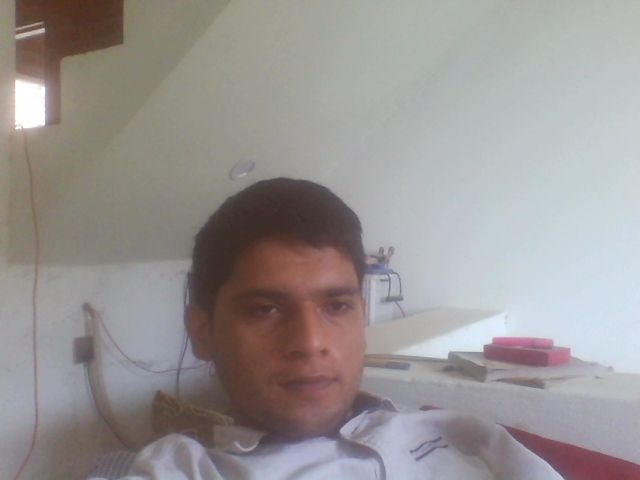

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))